# Upload files in Google Colab
If you are running this Jupyter Notebook on Google Colab, run this cell to upload the data files (train_inputs.csv, train_targets.csv, test_inputs.csv, test_targets.csv) in the colab virtual machine.  You will be prompted to select files that you would like to upload. 

If you are running this Jupyter Notebook on your computer, you do not need to run this cell.

In [2]:
from google.colab import files
uploaded = files.upload()
%ls

sample_data/     test_labels.csv   train_labels.csv
test_inputs.csv  train_inputs.csv


# Import libraries 
Do not use any other Python library.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function: load_logistic_regression_data

This function loads the data for Logistic Regression from a local drive into RAM

Outputs:

*   **train_inputs**: numpy array of N training data points x M features
*   **train_labels**: numpy array of N training labels
*   **test_inputs**: numpy array of N' test data points x M features
*   **test_labels**: numpy array of N' test labels

In [4]:
def load_logistic_regression_data():
  test_inputs = np.genfromtxt('test_inputs.csv', delimiter=',')
  test_labels = np.genfromtxt('test_labels.csv', delimiter=',')
  train_inputs = np.genfromtxt('train_inputs.csv', delimiter=',')
  train_labels = np.genfromtxt('train_labels.csv', delimiter=',')
  return train_inputs, train_labels, test_inputs, test_labels

# Function: sigmoid

This function implements the logistic sigmoid.

Input:
*   **input**: vector of inputs (numpy array of floats)

Output:
*   **output**: vector of outputs (numpy array of floats)

In [5]:
def sigmoid(input):

  # dummy assignment until the function is filled in
  output = np.zeros(len(input))
  for i in range(len(input)):
    output[i] = 1/(1 + np.exp(-input[i]))
  return output

# Function: predict_logistic_regression

This function uses a vector of weights to make predictions for a set of inputs.  The prediction for each data point is a distribution over the labels.  Assume that there are only two possible labels {0,1}.

Inputs:
*   **inputs**: matrix of input data points for which we want to make a prediction (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)

Output:
*   **predicted_probabilities**: matrix of predicted probabilities (numpy array of N data points x 2 labels)

In [6]:
def predict_logistic_regression(inputs, weights):

  # dummy assignment until the function is filled in
  predicted_probabilities = np.zeros((inputs.shape[0],2))
  predicted_values = sigmoid(np.dot(inputs, weights))
  # 0th element is probability of label = 0
  # 1st element is probability of label = 1
  for i in range(inputs.shape[0]):
    predicted_probabilities[i][0] = 1 - predicted_values[i]
    predicted_probabilities[i][1] = predicted_values[i]
  return predicted_probabilities

# Function eval_logistic_regression

This function evaluates a set of predictions by computing the negative log probabilities of the labels and the accuracy (percentage of correctly predicted labels).  Assume that there are only two possible labels {0,1}.  A data point is correctly labeled when the probability of the target label is >= 0.5.

Inputs:
*   **inputs**: matrix of input data points for which we will evaluate the predictions (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)
*   **labels**: vector of target labels associated with the inputs (numpy array of N labels)

Outputs:
*   **neg_log_prob**: negative log probability of the set of predictions (float)
*   **accuracy**: percentage of correctly labeled data points (float)

In [7]:
def eval_logistic_regression(inputs, weights, labels):
  
  # dummy assignment until the function is filled in
  accuracy = 0
  neg_log_prob = 0
  # N data points * 2 labels
  predicted_probabilities = predict_logistic_regression(inputs, weights)
  #number of correct labels
  correct_labels = 0
  neg_log_prob = 0
  for i in range(labels.size):
    if predicted_probabilities[i][0] >= 0.5:
      neg_log_prob -= np.log(predicted_probabilities[i][labels[i]])
      if labels[i] == 0:
        correct_labels += 1
    elif predicted_probabilities[i][0] < 0.5:
      neg_log_prob -= np.log(predicted_probabilities[i][labels[i]])
      if labels[i] == 1:    
        correct_labels += 1
  accuracy = correct_labels / labels.size
  return neg_log_prob, accuracy

Function: initialize_weights

This function initializes the weights uniformly at random in the interval [-0.05,0.05]

Input:
*   **n_weights**: # of weights to be initialized (integer)

Output:
*   **random_weights**: vector of weights (numpy array of floats)

In [8]:
def initialize_weights(n_weights):

  # dummy assignment until the function is filled in
  random_weights = np.random.uniform(-0.05, 0.05, n_weights)
  return random_weights

# Function train_logistic_regression

This function optimizes a set of weights for logistic regression based on a training set.  Initialize the weights with the function initialize_weights.  Implement Newton's algorithm to optimize the weights.  Stop Newton's algorithm when the maximum change for all weights is less than 0.001 in two consecutive iterations. Assume that there are only two labels {0,1}.

Inputs:
*   **train_inputs**: matrix of input training points (numpy array of N data points x M+1 features)
*   **train_labels**: vector of labels associated with the inputs (numpy array of N labels)
*   **lambda_hyperparam**: lambda hyperparameter used to adjust the importance of the regularizer (scalar)

Output:
*   **weights**: vector of weights that have been optimized (numpy array of M+1 weights)



In [9]:
def train_logistic_regression(train_inputs, train_labels, lambda_hyperparam):

  # dummy assignment until the function is filled in
  # Initialize the weights with the function initialize_weights
  weights = initialize_weights(train_inputs.shape[1])
  # calculate R for Hessian
  predicted_probabilities = predict_logistic_regression(train_inputs, weights)
  R_diag = np.zeros(train_inputs.shape[0])
  for i in range(len(R_diag)):
    R_diag[i] = predicted_probabilities[i][0] * predicted_probabilities[i][1]
  R = np.diag(R_diag)
  # calculate Hessian
  Hessian = np.transpose(train_inputs).dot(R).dot(train_inputs)
  lambdaI = lambda_hyperparam * np.identity(len(Hessian))
  Hessian = Hessian + lambdaI

  # Using Newton's Methods
  while True:
    predicted_probabilities = predict_logistic_regression(train_inputs, weights)
    lambdaw = lambda_hyperparam * weights
    prop_labels = np.zeros(train_inputs.shape[0])
    for i in range(train_inputs.shape[0]):
      prop_labels[i] = predicted_probabilities[i][1] - train_labels[i]
    gradient = np.transpose(train_inputs).dot(prop_labels) + lambdaw
    Hessian_inv = np.linalg.inv(Hessian)
    weights_new = weights - Hessian_inv.dot(gradient)
    dist = np.linalg.norm(weights - weights_new, ord=np.inf)
    weights = weights_new
    if dist < 0.001:
      break
  return weights

# Function cross_validation_logistic_regression

This function performs k-fold cross validation to determine the best lambda hyperparameter in logistic regression

Inputs:
*   **k_folds**: # of folds in cross-validation (integer)
*   **hyperparameters**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)
*   **inputs**: matrix of input points (numpy array of N data points by M+1 features)
*   **labels**: vector of labels associated with the inputs (numpy array of N labels)

Outputs:
*   **best_hyperparam**: best lambda value for logistic regression (float)
*   **best_neg_log_prob**: negative log probabilty achieved with best_hyperparam (float)
*   **neg_log_probabilities**: vector of negative log probabilities for the corresponding hyperparameters (numpy array of floats)



In [10]:
def cross_validation_logistic_regression(k_folds, hyperparameters, inputs, labels):
  
  # dummy assignments until the function is filled in
  best_hyperparam = 0
  best_neg_log_prob = 0
  neg_log_probabilities = np.zeros(len(hyperparameters))

  num_split = int(inputs.shape[0] / k_folds)
  for i in range(len(hyperparameters)):
    neg_log_probability = 0
    lambda_val = hyperparameters[i]
    for j in range(k_folds):
      train_inputs = np.concatenate((inputs[:j * num_split], inputs[(j+1) * num_split:]), axis = 0)
      train_labels = np.concatenate((labels[:j * num_split], labels[(j+1) * num_split:]), axis = 0)
      test_inputs = inputs[j * num_split: (j+1) * num_split]
      test_labels = labels[j * num_split: (j+1) * num_split]
      weights = train_logistic_regression(train_inputs, train_labels, lambda_val)
      neg_log_prob, accuracy = eval_logistic_regression(test_inputs, weights, test_labels)
      neg_log_probability += neg_log_prob
    neg_log_probabilities[i] =  neg_log_probability / k_folds
  best_hyperparam = hyperparameters[np.argmin(neg_log_probabilities)]
  best_neg_log_prob = neg_log_probabilities[np.argmin(neg_log_probabilities)]
  return best_hyperparam, best_neg_log_prob, neg_log_probabilities

# Function: plot_logistic_regression_neg_log_probabilities

Function that plots the negative log probabilities for different lambda values (hyperparameters) in logistic regression based on cross validation

Inputs:
*   **neg_log_probabilities**: vector of negative log probabilities for the corresponding hyperparameters (numpy array of floats)
*   **hyperparams**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)

In [11]:
def plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,hyperparams):
  plt.plot(hyperparams,neg_log_probabilities)
  plt.ylabel('negative log probability')
  plt.xlabel('lambda')
  plt.show()

# Main Logistic Regression code

Load data (rescale the inputs to be in the [-1,1] range, add 1 at the end of each datapoint and rename the labels 5,6 to 0,1).
Use k-fold cross validation to find the best lambda value for logistic regression.
Plot the negative log probabilities for different lambda values.
Test logistic regression with the best lambda value.

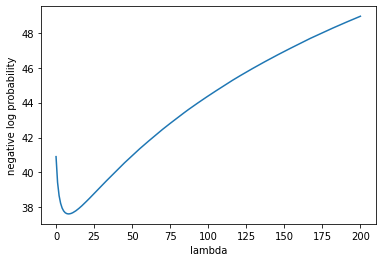

best lambda: 8
best cross validation negative log probability: 37.618162098875324
test accuracy: 0.8727272727272727
test negative log probability: 33.31947924653054


In [12]:
# load data
train_inputs, train_labels, test_inputs, test_labels = load_logistic_regression_data()

# rescale inputs in the [-1,1] range
train_inputs = (train_inputs - 8)/8
test_inputs = (test_inputs - 8)/8

# add 1 at the end of each data point
train_inputs = np.concatenate((train_inputs,np.ones((train_inputs.shape[0],1))),1)
test_inputs = np.concatenate((test_inputs,np.ones((test_inputs.shape[0],1))),1)

# rename the classes 5,6 to 0,1
train_labels = train_labels.astype(int) - 5
test_labels = test_labels.astype(int) - 5

# lambda values to be evaluated by cross validation
hyperparams = range(201)
k_folds = 10
best_lambda, best_neg_log_prob, neg_log_probabilities = cross_validation_logistic_regression(k_folds,hyperparams,train_inputs,train_labels)

# plot results
plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,hyperparams)
print('best lambda: ' + str (best_lambda))
print('best cross validation negative log probability: ' + str(best_neg_log_prob))

# train and evaluate with best lambda
weights = train_logistic_regression(train_inputs,train_labels,best_lambda)
neg_log_prob, accuracy = eval_logistic_regression(test_inputs, weights, test_labels)
print('test accuracy: ' + str(accuracy))
print('test negative log probability: ' + str(neg_log_prob))


Part2: \\
i) Logistic regression finds a linear separator where as k-Nearest Neighbours (in Assignment 1) finds a non-linear separator. Add some text at the end of the Jupyter Notebook that compares the expressivity of the separators. Discuss under what circumstances each type of separator is expected to perform best. What could explain the results obtained with KNN in comparison to the results obtained with logistic regression? \\

Answer: Logistic regression has a better performance if the train_data is linearly separable. KNN supports non-linear solutions (logistic regression only supports linear solution). 



ii) Is the training set used in this assignment linearly separable? To answer this question, add some code to the Jupyter Notebook that uses a logistic regression classifier to determine whether the training set is linearly separable. Add some text that explains why this code can determine the linear separability of a dataset. Indicate whether the training set is linearly separable based on the results.

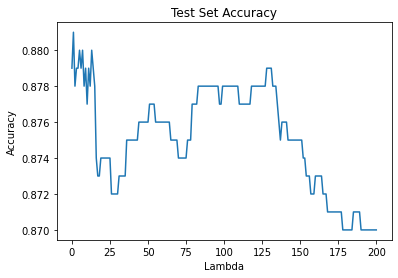

In [26]:
accuracies = np.zeros(201)
for lmbda in range(201):
  weights = train_logistic_regression(train_inputs,train_labels,lmbda)
  neg_log_prob, accuracy = eval_logistic_regression(train_inputs, weights, train_labels)
  accuracies[lmbda] = accuracy

plt.plot(range(201), accuracies)
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Test Set Accuracy')
plt.show()

Answer: As the accuracy of `eval_logistic_regression` of train_inputs and train_labels is not 100%. It shows that the training set used is not linearly separable. 